<a href="https://colab.research.google.com/github/Ekaterina-31/Kursovaya-Chemical-Compounds/blob/main/5_ML_%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_IC50_%3E_%D0%BC%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация: превышает ли значение IC50 медианное значение выборки

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Загрузка датасета

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/8 Классическое МО (ML)/Курсовая работа Хим соединения/df.xlsx')
df

,"IC50, mM","CC50, mM",SI,"IC50, mM_log","CC50, mM_log",SI_log,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_thiophene,fr_unbrch_alkane,fr_urea,Chi,Kappa,PEOE_VSA,SMR_VSA,SlogP_VSA,EState_VSA,VSA_EState
0,6.239374,175.482382,28.125000,1.979535,5.173221,3.371597,0.203662,0.203662,0.281677,0.881996,...,0,0.15,0,6.244950,0.872278,1.849596,1.656534,1.409310,1.363038,3.212521
1,0.771831,5.402819,7.000000,0.572014,1.856738,2.079442,0.120448,0.120448,0.388360,0.899521,...,0,0.15,0,6.601003,0.914682,1.350636,1.564823,1.654294,1.111547,3.036357
2,223.808778,161.142320,0.720000,5.415250,5.088474,0.542324,0.022420,0.022420,0.395171,0.900640,...,0,0.15,0,8.046121,1.065814,2.125484,1.729382,1.507932,1.261023,3.605910
3,1.705624,107.855654,63.235294,0.995333,4.690023,4.162553,0.203902,0.203902,0.284134,0.882400,...,0,0.20,0,6.474522,0.955535,1.899410,1.693357,1.444191,1.386790,3.236238
4,107.131532,139.270991,1.300000,4.683348,4.943576,0.832909,0.207807,0.207807,0.196742,0.868043,...,0,0.00,0,7.283966,1.008745,2.041540,2.036026,2.085103,1.578446,3.844661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,3.465739,3.583509,0.755660,0.779703,0.779703,0.034912,0.778814,...,0,0.00,0,6.341904,0.771707,1.858068,1.899974,2.107205,1.926522,3.177215
997,31.999934,33.999415,1.062484,3.496506,3.555331,0.723911,0.831164,0.831164,0.022036,0.752137,...,0,0.00,0,7.167030,1.037718,2.343830,2.191027,2.471311,2.163199,3.334032
998,30.999883,33.999458,1.096761,3.465732,3.555333,0.740394,0.857343,0.857343,0.019276,0.757941,...,0,0.00,0,7.909882,1.261307,2.678913,2.474751,2.781308,2.369348,3.486369
999,31.998959,32.999644,1.031272,3.496476,3.526350,0.708662,0.845478,0.845478,0.106566,0.667368,...,0,0.00,0,7.060575,1.358744,2.691922,2.348154,2.608160,2.111231,3.344150


## Подготовка данных для обучения модели

In [ ]:
IC50_median = df['IC50, mM'].median()
IC50_median

46.58518345980803

In [ ]:
y = (df['IC50, mM'] > IC50_median).astype(int)
y

,"IC50, mM"
0,0
1,0
2,1
3,0
4,1
...,...
996,0
997,0
998,0
999,0


In [ ]:
# исключаем прочие целевые переменные
X = df.drop(columns=['IC50, mM', 'CC50, mM', 'SI', 'IC50, mM_log', 'CC50, mM_log', 'SI_log'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train dataset size: {X_train.shape}, {y_train.shape}")
print(f"Test dataset size: {X_test.shape}, {y_test.shape}")

Train dataset size: (800, 129), (800,)
Test dataset size: (201, 129), (201,)


## Выбор лучшей модели без гиперпараметров

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [ ]:
# Список моделей
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "CatBoost": CatBoostClassifier(),
    # "SVM": SVC(),
}

In [ ]:
%%time
import warnings
warnings.filterwarnings("ignore")

scores = []
predictions = {}

for model_name, model in models.items():
    res = {}

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    predictions[model_name] = y_pred

    res["model"] = model_name
    res["roc_auc"] = roc_auc_score(y_test, y_pred)
    res["accuracy"] = accuracy_score(y_test, y_pred)
    res["recall"] = recall_score(y_test, y_pred, average="weighted")
    res["precision"] = precision_score(y_test, y_pred, average="weighted")
    res["f1"] = f1_score(y_test, y_pred, average="weighted")

    scores.append(res)

scores = pd.DataFrame(scores)

Learning rate set to 0.009366
0:	learn: 0.6913432	total: 77.9ms	remaining: 1m 17s
1:	learn: 0.6880936	total: 94.5ms	remaining: 47.2s
2:	learn: 0.6853457	total: 131ms	remaining: 43.4s
3:	learn: 0.6824799	total: 196ms	remaining: 48.8s
4:	learn: 0.6803056	total: 239ms	remaining: 47.5s
5:	learn: 0.6784862	total: 317ms	remaining: 52.4s
6:	learn: 0.6770258	total: 339ms	remaining: 48.1s
7:	learn: 0.6746806	total: 406ms	remaining: 50.4s
8:	learn: 0.6727208	total: 486ms	remaining: 53.6s
9:	learn: 0.6709988	total: 537ms	remaining: 53.2s
10:	learn: 0.6687927	total: 568ms	remaining: 51.1s
11:	learn: 0.6664220	total: 589ms	remaining: 48.5s
12:	learn: 0.6641888	total: 615ms	remaining: 46.7s
13:	learn: 0.6623777	total: 650ms	remaining: 45.8s
14:	learn: 0.6599246	total: 679ms	remaining: 44.6s
15:	learn: 0.6582417	total: 714ms	remaining: 43.9s
16:	learn: 0.6560097	total: 743ms	remaining: 43s
17:	learn: 0.6547000	total: 771ms	remaining: 42.1s
18:	learn: 0.6529631	total: 800ms	remaining: 41.3s
19:	learn:

In [ ]:
scores

,model,roc_auc,accuracy,recall,precision,f1
0,Decision Tree,0.631980,0.631841,0.631841,0.632422,0.631567
1,Random Forest,0.701832,0.701493,0.701493,0.705685,0.700142
2,KNN,0.671782,0.671642,0.671642,0.672353,0.671398
3,CatBoost,0.716881,0.716418,0.716418,0.724700,0.713998


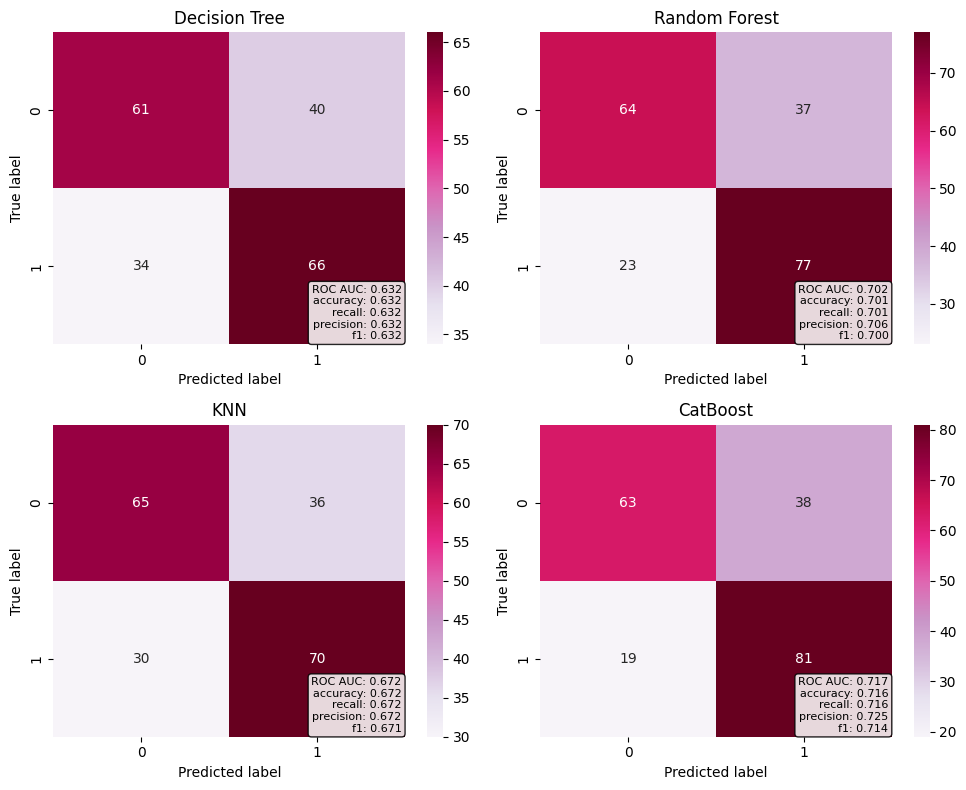

In [ ]:
import math
from sklearn.metrics import confusion_matrix

n_models = len(models)
n_cols = 2
n_rows = math.ceil(n_models / n_cols)  # автоматически вычисляем количество строк

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), dpi=100)
axes = axes.flatten()

for ax, (name, y_pred) in zip(axes, predictions.items()):
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='PuRd',
        ax=ax,
        xticklabels=['0', '1'],
        yticklabels=['0', '1']
    )
    ax.set_title(name)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    recall_weighted = recall_score(y_test, y_pred, average='weighted')
    precision_weighted = precision_score(y_test, y_pred, average='weighted')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)

    # Текст метрик
    metrics_text = (f"ROC AUC: {roc_auc:.3f}\n"
                    f"accuracy: {accuracy:.3f}\n"
                    f"recall: {recall_weighted:.3f}\n"
                    f"precision: {precision_weighted:.3f}\n"
                    f"f1: {f1_weighted:.3f}")

    ax.text(
        0.99, 0.01, metrics_text,
        transform=ax.transAxes,
        va='bottom', ha='right',
        fontsize=8, color='black',
        bbox=dict(boxstyle='round,pad=0.3',
                  facecolor='white',
                  edgecolor='black',
                  alpha=0.85)
    )

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_max_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 're

## Выбор лучшей модели с гиперпараметрами

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from skopt import BayesSearchCV

# Список моделей и их гиперпараметров
models = {
    "DecisionTree": (DecisionTreeClassifier(), {
        'max_depth': (1, 20),
        'min_samples_split': (8, 15),
    }),
    "RandomForest": (RandomForestClassifier(), {
        'n_estimators': (100, 250),
        'max_depth': (1, 20),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 8),
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': (1, 20),
        'weights': ['uniform', 'distance'],
    }),
    "CatBoost": (CatBoostClassifier(), {
        'n_estimators': (50, 100),
        'depth': (1, 15),
    }),
}

In [ ]:
%%time
# Перебор моделей
best_model = None
best_score = -float("inf")
best_params = {}

results = []

def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    # roc_auc = roc_auc_score(y_test, y_pred)
    return {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1': f1}

for name, (model, params) in models.items():

    # Байесовская оптимизация гиперпараметров
    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=params,
        n_iter=15,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )

    # Обучение модели
    bayes_search.fit(X_train, y_train)

    y_pred = bayes_search.predict(X_test)

    scores = evaluate_model(y_test, y_pred)

    # Проверка, стала ли эта модель лучшей
    if bayes_search.best_score_ > best_score:
        best_score = bayes_search.best_score_
        best_model = name
        best_params = bayes_search.best_params_

    results.append({
    'Модель': name,
    'ROC AUC': bayes_search.best_score_,
    'accuracy': scores['accuracy'],
    'recall': scores['recall'],
    'precision': scores['precision'],
    'f1': scores['f1'],
    'Гиперпараметры': bayes_search.best_params_,
    })

Learning rate set to 0.088842
0:	learn: 0.6747942	total: 65.4ms	remaining: 5.56s
1:	learn: 0.6470912	total: 87.1ms	remaining: 3.66s
2:	learn: 0.6320536	total: 116ms	remaining: 3.22s
3:	learn: 0.6161057	total: 158ms	remaining: 3.25s
4:	learn: 0.6041629	total: 184ms	remaining: 2.98s
5:	learn: 0.5883313	total: 210ms	remaining: 2.8s
6:	learn: 0.5736958	total: 232ms	remaining: 2.62s
7:	learn: 0.5631845	total: 254ms	remaining: 2.48s
8:	learn: 0.5522267	total: 281ms	remaining: 2.4s
9:	learn: 0.5402472	total: 304ms	remaining: 2.31s
10:	learn: 0.5292393	total: 327ms	remaining: 2.23s
11:	learn: 0.5203094	total: 349ms	remaining: 2.15s
12:	learn: 0.5107772	total: 372ms	remaining: 2.09s
13:	learn: 0.5039165	total: 394ms	remaining: 2.02s
14:	learn: 0.4995832	total: 419ms	remaining: 1.98s
15:	learn: 0.4914074	total: 440ms	remaining: 1.93s
16:	learn: 0.4795455	total: 463ms	remaining: 1.88s
17:	learn: 0.4716101	total: 486ms	remaining: 1.84s
18:	learn: 0.4648203	total: 511ms	remaining: 1.8s
19:	learn: 0

In [ ]:
pd.DataFrame(results)

,Модель,ROC AUC,accuracy,recall,precision,f1,Гиперпараметры
0,DecisionTree,0.725734,0.636816,0.636816,0.643443,0.633003,"{'max_depth': 7, 'min_samples_split': 8}"
1,RandomForest,0.812266,0.721393,0.721393,0.727367,0.719729,"{'max_depth': 16, 'min_samples_leaf': 4, 'min_..."
2,KNN,0.777484,0.651741,0.651741,0.653729,0.650391,"{'n_neighbors': 6, 'weights': 'uniform'}"
3,CatBoost,0.808547,0.701493,0.701493,0.705685,0.700142,"{'depth': 7, 'n_estimators': 86}"


In [ ]:
# Вывод лучшей модели
print("Лучшая модель:", best_model)
print("Лучшие параметры:", best_params)
print("Лучший ROC AUC:", best_score)

Лучшая модель: RandomForest
Лучшие параметры: OrderedDict([('max_depth', 16), ('min_samples_leaf', 4), ('min_samples_split', 6), ('n_estimators', 207)])
Лучший ROC AUC: 0.812265625


## Подбор гиперпараметров для выбранной модели

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Определяем модель
rf_model = RandomForestClassifier(random_state=42)

# Определяем параметры для поиска
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Количество деревьев
    'max_depth': [10, 20, 30],  # Максимальная глубина деревьев
    'min_samples_split': [2, 5, 10],  # Минимальное количество сэмплов для разбиения узла
    'min_samples_leaf': [2, 4, 6],  # Минимальное количество сэмплов в листе
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, n_jobs=-1, scoring='roc_auc', verbose=2)

# Обучение на данных
grid_search.fit(X_train, y_train)

# Оценка модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

Fitting 2 folds for each of 108 candidates, totalling 216 fits
CPU times: user 2.64 s, sys: 428 ms, total: 3.06 s
Wall time: 2min 41s


In [ ]:
# Вывод лучших параметров
print("Best parameters found: ", grid_search.best_params_)

print(f"Best score (ROC AUC): {best_score:.4f}")

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best score (ROC AUC): 0.7880


## Предсказание на всех данных

In [ ]:
# сделаем предсказания на тесте
y_pred = best_model.predict(X)

# y - это правильные ответы для X
print(f'ROC AUC: {roc_auc_score(y, y_pred)}')

ROC AUC: 0.8631596806387226
